In [150]:
import xml.etree.cElementTree as ET
import nltk
from functools import reduce
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
from scipy.stats import norm
import numpy
import math
from matplotlib.ticker import ScalarFormatter 
import random

1)

In [130]:
def tokenize(text, remove_stopwords=True, allowed_words = [], lemat=False):
    stopWords = set(stopwords.words('english'))|set(["''",",''",".''",".,'","...",".,",'``','--'])
    tokens = nltk.wordpunct_tokenize(text)
    tokens = [word.lower() for word in tokens if len(word) > 1]
    tokens = [word for word in tokens if (not (word in stopWords and remove_stopwords) or word in allowed_words)
              and not word.isdigit()]
    
    if lemat:
        porter_stemmer = PorterStemmer()
        tokens = [porter_stemmer.stem(word) for word in tokens]
    return tokens

In [16]:
root = ET.ElementTree(file='ap/ap.xml').getroot()

dic = {}
full_text = []
for node in root:
    docno, text = node
    dic[docno.text.strip()] = text.text

full_text = ''.join([v for k,v in dic.items()])

In [17]:
tokens = tokenize(full_text)
fd = nltk.FreqDist(tokens)
most_common_s = set(sorted(fd, key=lambda x: fd[x],reverse=True)[:500])
most_common_s

{'according',
 'accused',
 'across',
 'action',
 'added',
 'administration',
 'africa',
 'agency',
 'ago',
 'agreed',
 'agreement',
 'aid',
 'air',
 'allowed',
 'along',
 'already',
 'also',
 'although',
 'america',
 'american',
 'americans',
 'among',
 'analysts',
 'announced',
 'another',
 'anti',
 'april',
 'area',
 'army',
 'around',
 'arrested',
 'asked',
 'association',
 'attack',
 'attorney',
 'authorities',
 'average',
 'away',
 'back',
 'bank',
 'based',
 'become',
 'began',
 'believe',
 'best',
 'better',
 'bid',
 'big',
 'bill',
 'billion',
 'black',
 'board',
 'british',
 'budget',
 'building',
 'bush',
 'business',
 'california',
 'call',
 'called',
 'came',
 'campaign',
 'capital',
 'care',
 'case',
 'center',
 'central',
 'cents',
 'chairman',
 'change',
 'charged',
 'charges',
 'chief',
 'children',
 'church',
 'city',
 'close',
 'closed',
 'co',
 'come',
 'commission',
 'committee',
 'communist',
 'community',
 'companies',
 'company',
 'computer',
 'condition',
 'conf

In [32]:
window_size = 5
bgm    = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(tokens, window_size)
finder.apply_ngram_filter(lambda w1, w2: w1 not in most_common_s or w2 not in most_common_s)
scored = finder.score_ngrams( bgm.pmi  )
scored

[(('yen', 'yen'), 8.28356792248923),
 (('prime', 'minister'), 7.841413165287644),
 (('human', 'rights'), 7.732321667365067),
 (('interest', 'rates'), 7.54467308099607),
 (('south', 'africa'), 7.431136276685496),
 (('telephone', 'interview'), 7.396397379478955),
 (('iraq', 'kuwait'), 7.3689499648561),
 (('dollar', 'yen'), 7.31126743723442),
 (('health', 'care'), 7.204177548717178),
 (('eastern', 'europe'), 7.150355762649646),
 (('cents', 'cents'), 7.113957698159364),
 (('stock', 'exchange'), 7.068094161797287),
 (('average', 'points'), 7.044384779070249),
 (('executive', 'officer'), 7.0181752869634355),
 (('gold', 'bid'), 6.893278336281581),
 (('michael', 'dukakis'), 6.774546155124629),
 (('west', 'german'), 6.743750240326996),
 (('yen', 'london'), 6.734807787299424),
 (('news', 'conference'), 6.714094197883895),
 (('exchange', 'index'), 6.708127834133119),
 (('chief', 'executive'), 6.684580809993964),
 (('district', 'judge'), 6.681157697894676),
 (('stock', 'index'), 6.658171312234071)

2)

In [88]:
orig_species_f = open('ap/pg1228.txt', 'r')
inputfile = orig_species_f.read()
tokens_orig = tokenize(inputfile, False, allowed_words = ['for'])

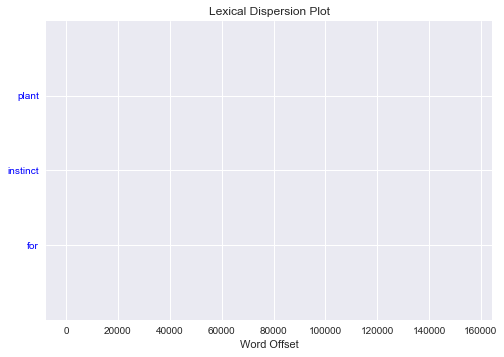

In [89]:
nltk.draw.dispersion.dispersion_plot(tokens_orig,['plant','instinct','for'])

In [138]:
def get_apps_for_word_in_text(aWord, aText):
    return [i for i,word in enumerate(aText) if word == '{}'.format(aWord)]

instinct_app = get_apps_for_word_in_text('instinct', tokens_orig)
plant_app = get_apps_for_word_in_text('plant', tokens_orig)
for_app = get_apps_for_word_in_text('for', tokens_orig)

len(tokens_orig)

156632

Para que termine usamos un salto cada 10 palabras

In [91]:
def sum_gaussians_in(aPos, apps):
    stdev = 50
    return sum([norm.pdf(aPos,j,50) for j in apps])

rowo_instinct = []
rowo_plant = []
rowo_for = []
## row is rate of word occurrency that sounds like rouo
for _rowo,_app, _word in [
    (rowo_instinct,instinct_app,'instict'),
    (rowo_plant,plant_app,'plant')]:
    #(rowo_for,for_app,'for')]:
    
    _rowo.extend([sum_gaussians_in(i,_app) for i in range(0,total_words,100)])
    print (_word)
    
#sns.plt.plot(range(0,total_words,100), [sum_gaussians_in(i,instinct_app) for i in range(0,total_words,100)])
#sns.plt.show()

instict
plant


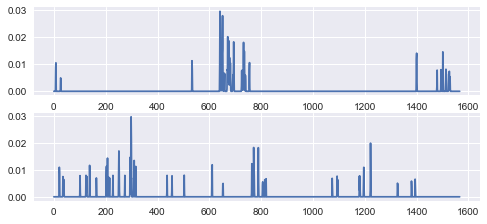

In [92]:
sns.plt.subplot(311)
sns.plt.plot(rowo_instinct)
sns.plt.subplot(312)
sns.plt.plot(rowo_plant)
#sns.plt.subplot(313)
#sns.plt.plot(rowo_for)
sns.plt.show()

In [93]:
def autocorrelacion(_row):
    pwt_avg = sum([ _row[pos] for pos in range(len(_row)) ]) / len(_row)
    cociente = pwt_avg**2 + sum([ _row[pos]**2 for pos in range(len(_row)) ]) / len(_row)

    taus = []

    for tau in range(100):
        pwt_tau_avg = sum([ _row[pos]*_row[pos+tau] for pos in range(0,len(_row)-tau)]) / (len(_row)-tau)
        taus.append(pwt_tau_avg - pwt_avg * (sum([_row[pos+tau] for pos in range(0,len(_row)-tau)]) / (len(_row)-tau)))
        taus[tau] /= cociente
    return taus

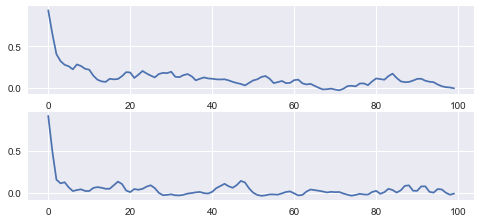

In [95]:
auto_rowo_instinct = autocorrelacion(rowo_instinct)
sns.plt.subplot(311)
sns.plt.plot(auto_rowo_instinct)

auto_rowo_plant = autocorrelacion(rowo_plant)
sns.plt.subplot(312)
sns.plt.plot(auto_rowo_plant)

#auto_rowo_for = autocorrelacion(rowo_for)
#sns.plt.subplot(313)
sns.plt.plot(rowo_for)

sns.plt.show()

In [146]:
fd_orig = nltk.FreqDist(tokens_orig)
salto = len(fd_orig)//1000
elegidas = dict()
fd_orig_s = sorted(fd_orig, key=lambda x: fd_orig[x],reverse=True)[:100]
fd_orig_s
for e in fd_orig_s:
        elegidas[e] = fd_orig[e]

elegidas

{'all': 575,
 'an': 510,
 'and': 4507,
 'animals': 297,
 'any': 551,
 'are': 1155,
 'as': 1602,
 'at': 704,
 'be': 1675,
 'been': 931,
 'being': 284,
 'believe': 216,
 'between': 339,
 'but': 867,
 'by': 1377,
 'can': 527,
 'case': 282,
 'cases': 226,
 'conditions': 222,
 'could': 235,
 'different': 286,
 'distinct': 257,
 'do': 257,
 'during': 219,
 'each': 550,
 'even': 212,
 'far': 200,
 'first': 201,
 'for': 1149,
 'forms': 403,
 'from': 1147,
 'genera': 220,
 'great': 262,
 'had': 244,
 'has': 613,
 'have': 1767,
 'having': 253,
 'how': 231,
 'if': 435,
 'in': 4073,
 'is': 1444,
 'it': 1069,
 'its': 416,
 'life': 307,
 'long': 245,
 'many': 453,
 'may': 524,
 'more': 580,
 'most': 407,
 'much': 232,
 'must': 243,
 'natural': 382,
 'nature': 262,
 'new': 256,
 'no': 333,
 'not': 891,
 'now': 233,
 'number': 205,
 'of': 7972,
 'often': 201,
 'on': 1568,
 'one': 646,
 'only': 267,
 'or': 1268,
 'other': 767,
 'our': 284,
 'period': 245,
 'plants': 335,
 'same': 793,
 'see': 273,
 'se

In [159]:
def freq_in_partition(w,p,p_total,text):
    desde = p*(len(text)//p_total)
    hasta = (p+1)*(len(text)//p_total)
    tot = 0
    for wt in text[desde:hasta]:
        if w==wt:
            tot += 1
    return tot

particiones = 64
entropias_orig = dict()
for w,freq in elegidas.items():
    entropia_w = 0
    for p in range(particiones):
        prob = freq_in_partition(w,p,particiones,tokens_orig)/freq
        if prob != 0:
            entropia_w += prob*(math.log(prob,2))
    entropia_w = -1*entropia_w
    entropias_orig[w] = entropia_w


tokens_shuffled = tokens_orig.copy()
random.shuffle(tokens_shuffled)
entropias_random = dict()
for w,freq in elegidas.items():
    entropia_w = 0
    for p in range(particiones):
        prob = freq_in_partition(w,p,particiones,tokens_shuffled)/freq
        if prob != 0:
            entropia_w += prob*(math.log(prob,2))
    entropia_w = -1*entropia_w
    entropias_random[w] = entropia_w

entropias_orig
entropias_random

{'all': 5.935558612978065,
 'an': 5.911241395484775,
 'and': 5.987869038159801,
 'animals': 5.8398776383185735,
 'any': 5.896250212013736,
 'are': 5.954635486332254,
 'as': 5.973281005880195,
 'at': 5.942773916924295,
 'be': 5.9713400229988745,
 'been': 5.946479173106185,
 'being': 5.837275930037539,
 'believe': 5.805270780753013,
 'between': 5.877271847887251,
 'but': 5.953945650979927,
 'by': 5.964902828380169,
 'can': 5.911573196520196,
 'case': 5.766838653313801,
 'cases': 5.831566297486986,
 'conditions': 5.822499993464594,
 'could': 5.812575314095845,
 'different': 5.848691116360712,
 'distinct': 5.769648894631051,
 'do': 5.8403779223236505,
 'during': 5.79010330059365,
 'each': 5.93043397704749,
 'even': 5.728086069461166,
 'far': 5.820336540814908,
 'first': 5.7411461150612295,
 'for': 5.95599012464454,
 'forms': 5.863832898084699,
 'from': 5.956849214694843,
 'genera': 5.778922333007607,
 'great': 5.830174416207871,
 'had': 5.801438716061744,
 'has': 5.923784418878702,
 'have'

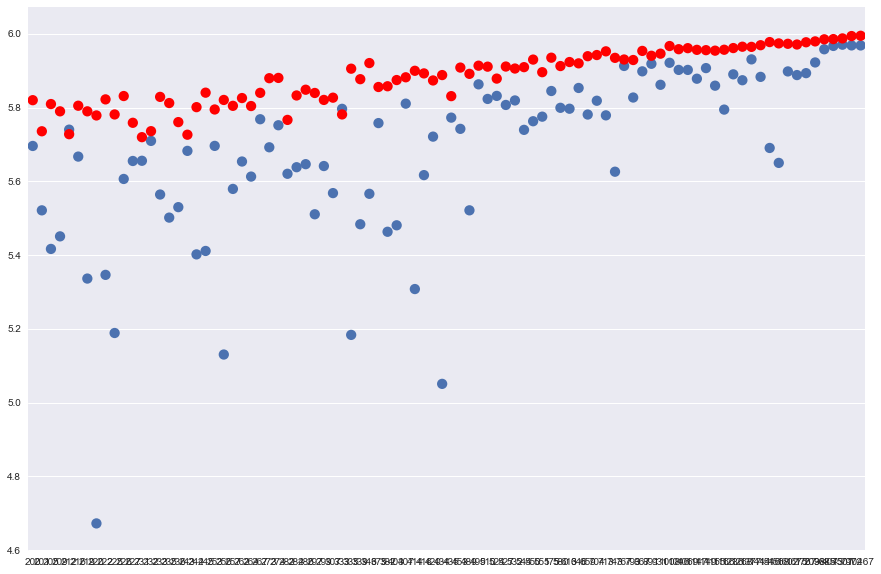

In [180]:
frequencies = []
entropies = []
entropies_shuff = []
for w,freq in elegidas.items():
    frequencies.append(freq)
    entropies.append(entropias_orig[w])
    entropies_shuff.append(entropias_random[w])

h = sns.pointplot(x=frequencies,y=entropies, join = False, ci = None)
g = sns.pointplot(x=frequencies,y=entropies_shuff, join = False, ci = None, color="red")
sns.mpl.rc("figure", figsize=(15,10))
sns.plt.show()